In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%load_ext autoreload
%reload_ext autoreload

import warnings; warnings.simplefilter('ignore')

#%ignore-warning
from sklearn import preprocessing

C:\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    

In [2]:
#Now join the various data set
#We are also replacing the NAN with 0
train = pd.read_csv('train.csv', parse_dates=['Date'])
train.columns = train.columns.str.lower()
features = pd.read_csv('features.csv', parse_dates=['Date'])
features.columns = features.columns.str.lower()
features[['markdown1', 'markdown2', 'markdown3','markdown4', 'markdown5']] = features[['markdown1', 'markdown2', 'markdown3','markdown4', 'markdown5']].fillna(0)
stores = pd.read_csv('stores.csv')
stores.columns = stores.columns.str.lower()
df_base = pd.merge(train,stores,on='store',how='left')
df_base = pd.merge(df_base,features,on=['store','date','isholiday'],how='left')

In [3]:
#See the type of each independent variable
#Need to encode : isholiday , type
#Get more features from date and then remove the date
#Step 1:Look at the data type
df_base.dtypes
df_base.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [4]:
#Step 2:Check for missing value
#Look for the missing values
#We have no missing values 
#Create a function for the same
def check_miss_val(df):
    print(df.isnull().sum())
check_miss_val(df_base)

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
type            0
size            0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
dtype: int64


In [5]:
#For providing additional info on the data
#This will generatet the report of all the variables
pandas_profiling.ProfileReport(df_base)

Number of variables,16
Number of observations,421570
Total Missing (%),0.0%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,1
Boolean,1
Date,1
Text (Unique),0
Rejected,0


In [6]:
#Step 3:Pre-processing - Removing irrelevant columne
#Looking at the report 
#We can drop all the markdown column
df_base.drop(columns=['markdown1','markdown2','markdown3','markdown4','markdown5'],axis=1,inplace=True)

In [19]:
#Step 3:Pre-processing - Encode categorical variable
#Now encode the categorical variable

cleanup = {'A':1 , 'B':2 , 'C':3}
df_base['type'] = df_base['type'].replace(cleanup,regex=True)


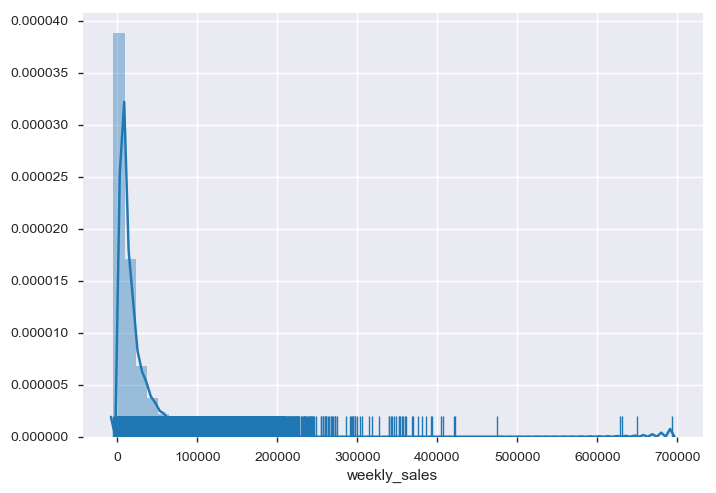

In [8]:
#Exploratory Data Analysis
#Target column
#It clear from the plot the data is +ve skewed
e1 = sns.distplot(df_base['weekly_sales'],rug=True,kde=True)

In [9]:
#Feature engineering from date
column_1 = df_base['date']

temp = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              #"hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              #"dayofweek": column_1.dt.dayofweek,
              #"weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

df_base.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)
df_base = pd.concat([df_base,temp],axis=1)

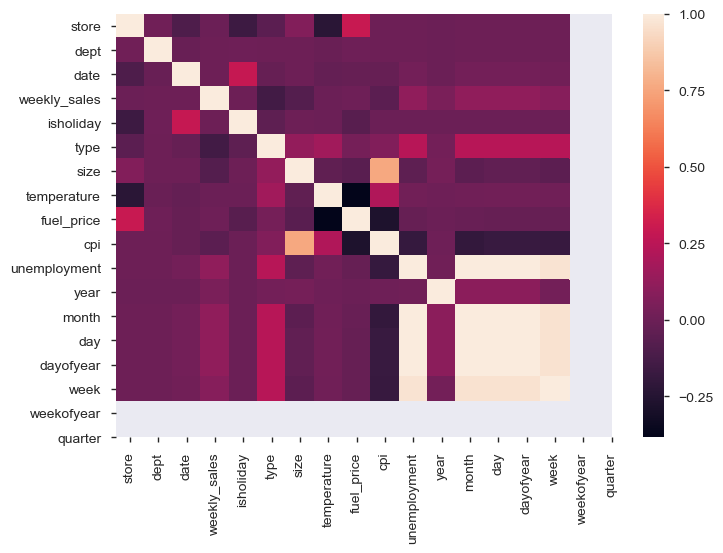

In [10]:
#Correlation graph 
#kendall
#pearson
corr = df_base.corr(method='spearman')
sns.heatmap(corr, 
        xticklabels=df_base.columns,
        yticklabels=df_base.columns)

In [21]:
#Linear regression 
Feature_matrix = df_base.copy(deep=True)
Feature_matrix.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,cpi,unemployment,year,month,day,dayofyear,week,weekofyear,quarter
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,36,5,5,1
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,211.242170,8.106,2010,2,12,43,6,6,1
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,211.289143,8.106,2010,2,19,50,7,7,1
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,211.319643,8.106,2010,2,26,57,8,8,1
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,211.350143,8.106,2010,3,5,64,9,9,1


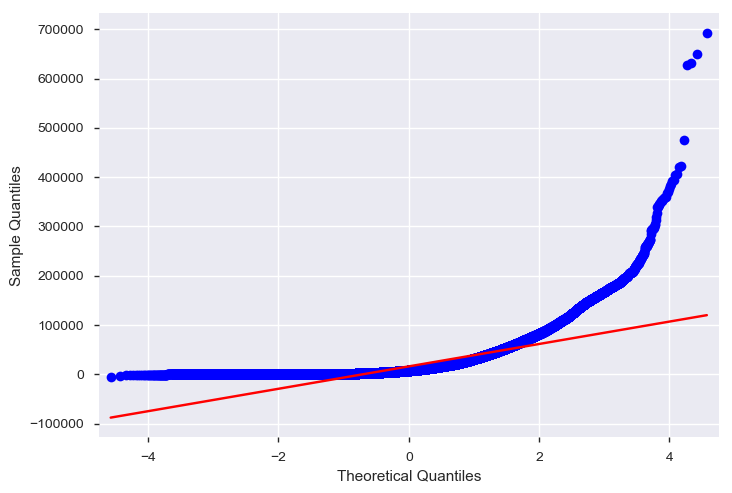

In [12]:
#Pre-process for the residual plot
#Looking at plot itself 
#This is normal distribution 
#We have to use non parametrice Test
from statsmodels.graphics.gofplots import qqplot
qqplot(df_base['weekly_sales'], line='s')
plt.show()

In [29]:
target = Feature_matrix['weekly_sales']
Feature_matrix.drop(columns=['date','weekly_sales'],axis=1,inplace=True)
Feature_matrix.head()

,store,dept,type,size,temperature,fuel_price,cpi,unemployment,year,month,day,dayofyear,week,weekofyear,quarter
0,1,1,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,36,5,5,1
1,1,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,12,43,6,6,1
2,1,1,1,151315,39.93,2.514,211.289143,8.106,2010,2,19,50,7,7,1
3,1,1,1,151315,46.63,2.561,211.319643,8.106,2010,2,26,57,8,8,1
4,1,1,1,151315,46.50,2.625,211.350143,8.106,2010,3,5,64,9,9,1


In [30]:
#e2 = sns.lineplot(x=df_base['date'],y=df_base['weekly_sales'],data=df_base,hue='isholiday')
df_base['isholiday'].unique()
Feature_matrix.drop(columns=['isholiday'],axis=1,inplace=True)
Feature_matrix.head()

KeyError: "labels ['isholiday'] not contained in axis"

In [33]:
#Linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_teat = train_test_split(Feature_matrix,target,test_size=0.2,random_state=29)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#Stats model
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [35]:
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           weekly_sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2455.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        11:08:56   Log-Likelihood:            -3.8458e+06
No. Observations:              337256   AIC:                         7.692e+06
Df Residuals:                  337242   BIC:                         7.692e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
store          -94.2848      3.098    -30.438   

In [36]:
#Quantities of interest can be extracted directly from the fitted model
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  store            -94.284830
dept             111.703296
type            1876.007081
size               0.103504
temperature       19.227554
fuel_price       104.634769
cpi              -19.283544
unemployment    -223.911628
year               3.882786
month          -7742.877432
day             -291.213856
dayofyear        667.849251
week           -1383.915791
weekofyear     -1383.915791
quarter        -1217.803597
dtype: float64
R2:  0.0864427909870592
